In [16]:
#There are five different types of delay that we take into account for flights
#I am looking at which type of delay causes the most NUMBER of delayed flights, and secondarily which type of delay causes the highest amount of minutes delayed  
#Make two graphs - one for the number of delays that occur, one for the total delay time (by delay type)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("../flight-delays/flights.csv")

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df["total_delay"] = df["DEPARTURE_DELAY"] + df["ARRIVAL_DELAY"]
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,total_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-33.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-17.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-14.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-22.0


In [17]:
df_air_clean = df["AIR_SYSTEM_DELAY"].dropna(how="any").reset_index()
df_air_clean = df_air_clean[df_air_clean['AIR_SYSTEM_DELAY'] != 0.0]
system_delay_count = df_air_clean["AIR_SYSTEM_DELAY"].count()
df_air_clean.head()

,index,AIR_SYSTEM_DELAY
0,27,25.0
1,30,43.0
3,50,20.0
5,55,17.0
9,86,13.0


In [18]:
system_delay_count

564826

In [7]:
df_security_clean = df["SECURITY_DELAY"].dropna(how="any").reset_index()
df_security_clean = df_security_clean[df_security_clean['SECURITY_DELAY'] != 0.0]
security_delay_count = df_security_clean["SECURITY_DELAY"].count()
security_delay_count

3484

In [8]:
df_airline_clean = df["AIRLINE_DELAY"].dropna(how="any").reset_index()
df_airline_clean = df_airline_clean[df_airline_clean['AIRLINE_DELAY'] != 0.0]
airline_delay_count = df_airline_clean["AIRLINE_DELAY"].count()
airline_delay_count

570022

In [9]:
df_late_clean = df["LATE_AIRCRAFT_DELAY"].dropna(how="any").reset_index()
df_late_clean = df_late_clean[df_late_clean['LATE_AIRCRAFT_DELAY'] != 0.0]
late_aircraft_count = df_late_clean["LATE_AIRCRAFT_DELAY"].count()
late_aircraft_count

556953

In [10]:
df_weather_clean = df["WEATHER_DELAY"].dropna(how="any").reset_index()
df_weather_clean = df_weather_clean[df_weather_clean['WEATHER_DELAY'] != 0.0]
weather_delay_count = df_weather_clean["WEATHER_DELAY"].count()
weather_delay_count

64716

In [11]:
air_delay_minutes = df["AIR_SYSTEM_DELAY"].sum()
air_delay_minutes

14335762.0

In [12]:
security_delay_minutes = df["SECURITY_DELAY"].sum()
security_delay_minutes

80985.0

In [13]:
airline_delay_minutes = df["AIRLINE_DELAY"].sum()
airline_delay_minutes

20172956.0

In [14]:
late_delay_minutes = df["LATE_AIRCRAFT_DELAY"].sum()
late_delay_minutes

24961931.0

In [15]:
weather_delay_minutes = df["WEATHER_DELAY"].sum()
weather_delay_minutes

3100233.0

Text(0.5,1,'Total Minutes Delayed by Delay Type (2015)')

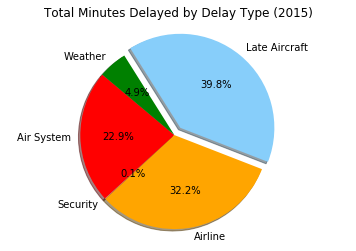

In [27]:
minutes_labels = ["Air System", "Security", "Airline", "Late Aircraft", "Weather"]
delay_minutes = [air_delay_minutes, security_delay_minutes, airline_delay_minutes, late_delay_minutes, weather_delay_minutes]
minutes_colors = ["red", "lightcoral", "orange", "lightskyblue", "green"]
minutes_explode = (0, 0, 0, .1, 0)

plt.pie(delay_minutes, explode=minutes_explode, labels=minutes_labels, colors=minutes_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Total Minutes Delayed by Delay Type (2015)")

Text(0.5,1,'Total Number of Flights Delayed by Delay Type (2015)')

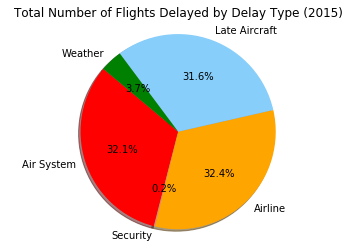

In [30]:
count_labels = ["Air System", "Security", "Airline", "Late Aircraft", "Weather"]
delay_count = [system_delay_count, security_delay_count, airline_delay_count, late_aircraft_count, weather_delay_count]
count_colors = ["red", "lightcoral", "orange", "lightskyblue", "green"]
#minutes_explode = (0, 0, 0, .1, 0)

plt.pie(delay_count, labels=count_labels, colors=count_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Total Number of Flights Delayed by Delay Type (2015)")